### The Evolution of Lewis Hamilton: A data driven career overview

In [28]:
#import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fastf1
from pathlib import Path
import numpy as np
import os

In [5]:
#set up a cache
fastf1.Cache.enable_cache('cache') 

In [ ]:
#getting names of circuits
years = list(range(2018,2025))

circuits = set()

for year in years:
    try:
        schedule = fastf1.get_event_schedule(year)
        event_names = schedule['EventName'].tolist()
        circuits.update(event_names)
    except Exception as e:
        print(f"Error fetching data from {year}: {e}")

print("Circuits from 2018-2024:")
for event in sorted(circuits):
    print(f"{event}")

In [ ]:
#extracting lap data
from fastf1.core import Session

years = [2018, 2019, 2020, 2021, 2022, 2023, 2024]

for year in years:
    try:
        schedule = fastf1.get_event_schedule(year)
        gp_names = schedule['EventName'].tolist()
    except Exception as e:
        print(f"Could not load schedule for year {year}: {e}")
        continue

    for gp in gp_names:
        if gp not in gp_names:
            print(f"Skipping {year} {gp} (not in schedule)")
            continue

        try:
            session = fastf1.get_session(year, gp, 'R')
            session.load()
            laps = session.laps.pick_drivers('HAM')
            gp = gp.replace(' ','_')
            filename = f"data/{year}_{gp}_laps.csv"
            laps.to_csv(filename)
            print(f"Saved data for {year} {gp}")
        except Exception as e:
            print(f"Skipping {year} {gp} due to error: {e}")

In [ ]:
#getting the calender for a particular year
events = fastf1.get_event_schedule(2021)
print(events[['EventName', 'EventFormat']])

In [ ]:
#getting just one session
from fastf1.core import Session
year = 2022
gp = 'Mexico City Grand Prix'
try:
        session = fastf1.get_session(year, gp, 'R')
        session.load()
        laps = session.laps.pick_drivers('HAM')
        gp = gp.replace(' ','_')
        filename = f"data/{year}_{gp}_laps.csv"
        laps.to_csv(filename)
        print(f"Saved data for {year} {gp}")
except Exception as e:
    print(f"Skipping {year} {gp} due to error: {e}")

In [3]:
df = pd.read_csv('data/2018_Abu_Dhabi_Grand_Prix_laps.csv')
print(df)

    Unnamed: 0                    Time Driver  DriverNumber  \
0          637  0 days 00:35:49.270000    HAM            44   
1          638  0 days 00:38:37.621000    HAM            44   
2          639  0 days 00:41:13.586000    HAM            44   
3          640  0 days 00:43:57.834000    HAM            44   
4          641  0 days 00:45:41.816000    HAM            44   
5          642  0 days 00:47:26.502000    HAM            44   
6          643  0 days 00:49:34.886000    HAM            44   
7          644  0 days 00:52:02.348000    HAM            44   
8          645  0 days 00:53:47.243000    HAM            44   
9          646  0 days 00:55:32.387000    HAM            44   
10         647  0 days 00:57:17.311000    HAM            44   
11         648  0 days 00:59:02.503000    HAM            44   
12         649  0 days 01:00:47.524000    HAM            44   
13         650  0 days 01:02:32.291000    HAM            44   
14         651  0 days 01:04:17.654000    HAM          

## Mercedes dominant years vs later years

Position NaN in last lap for file 2018_Austrian_Grand_Prix_laps.csv
Position NaN in last lap for file 2018_Bahrain_Grand_Prix_laps.csv
Position NaN in last lap for file 2020_Austrian_Grand_Prix_laps.csv
Position NaN in last lap for file 2020_Pre-Season_Test_1_laps.csv
Position NaN in last lap for file 2020_Pre-Season_Test_2_laps.csv
No valid laps in file 2020_Sakhir_Grand_Prix_laps.csv
Position NaN in last lap for file 2022_Belgian_Grand_Prix_laps.csv
Position NaN in last lap for file 2023_Qatar_Grand_Prix_laps.csv
Position NaN in last lap for file 2024_Australian_Grand_Prix_laps.csv
Position NaN in last lap for file 2024_United_States_Grand_Prix_laps.csv


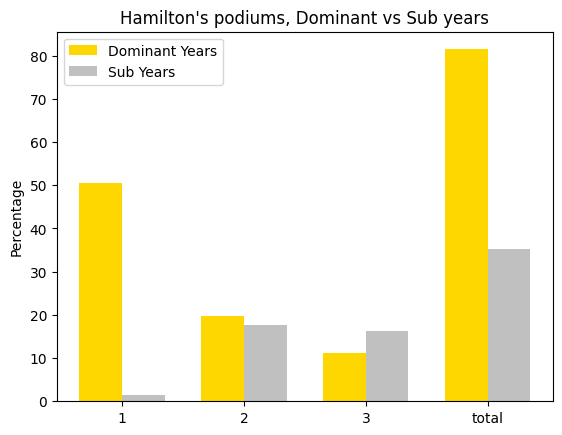

In [15]:
#dominant years
years = [2018, 2019, 2020, 2021]
data_path = Path("data")

count_1_high = 0
count_2_high = 0
count_3_high = 0
races_high = 0

for year in years:
    schedule = fastf1.get_event_schedule(year)
    races_high += len(schedule[schedule['Session5'] == 'Race'])
    for file in data_path.glob(f"{year}_*_laps.csv"):
        df = pd.read_csv(file)

        last_lap_val = df['LapNumber'].max()
        if pd.notna(last_lap_val):
            last_lap = int(last_lap_val)
            last_lap_data = df[df['LapNumber'] == last_lap]
            
            if not last_lap_data.empty and pd.notna(last_lap_data['Position'].iloc[0]):
                pos = int(last_lap_data['Position'].iloc[0])
                if pos == 1:
                    count_1_high += 1
                elif pos == 2:
                    count_2_high += 1
                elif pos == 3:
                    count_3_high += 1
            else:
                print(f"Position NaN in last lap for file {file.name}")
        else:
            print(f"No valid laps in file {file.name}")


#not so dominant years
years = [2022, 2023, 2024]
data_path = Path("data")

count_1_low = 0
count_2_low = 0
count_3_low = 0
races_low = 0

for year in years:
    schedule = fastf1.get_event_schedule(year)
    races_low += len(schedule[schedule['Session5'] == 'Race'])
    for file in data_path.glob(f"{year}_*_laps.csv"):
        df = pd.read_csv(file)

        last_lap_val = df['LapNumber'].max()
        if pd.notna(last_lap_val):
            last_lap = int(last_lap_val)
            last_lap_data = df[df['LapNumber'] == last_lap]
            
            if not last_lap_data.empty and pd.notna(last_lap_data['Position'].iloc[0]):
                pos = int(last_lap_data['Position'].iloc[0])
                if pos == 1:
                    count_1_low += 1
                elif pos == 2:
                    count_2_low += 1
                elif pos == 3:
                    count_3_low += 1
            else:
                print(f"Position NaN in last lap for file {file.name}")
        else:
            print(f"No valid laps in file {file.name}")

podium = [1,2,3, 'total']
total_h =(count_1_high*100/races_high) + (count_2_high*100/races_high) + (count_3_high*100/races_high)
total_l = (count_1_low*100/races_low) + (count_2_low*100/races_low) + (count_3_low*100/races_low)
dominant_counts = [count_1_high*100/races_high, count_2_high*100/races_high, count_3_high*100/races_high, total_h]
sub_counts = [count_1_low*100/races_low, count_2_low*100/races_low, count_3_low*100/races_low, total_l]

x = np.arange(len(podium))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, dominant_counts, width, label = 'Dominant Years', color = 'gold')
ax.bar(x + width/2, sub_counts, width, label = 'Sub Years', color = 'silver')

ax.set_xticks(x)
ax.set_xticklabels(podium)
ax.set_ylabel('Percentage')
ax.set_title("Hamilton's podiums, Dominant vs Sub years")
ax.legend()
plt.show()

### Focussing on his dominant years

In [17]:
#extracting driver data
years = [2018, 2019, 2020, 2021]
results = {}
for year in years:
        try:
            season_results = fastf1.get_standings(year, 'R')
            lewis_points = season_results.loc[season_results['Driver'] == 'HAM', 'Points'].values[0]
            results[year] = lewis_points
        except Exception as e:
            print(f"Error fetching results for {year}: {e}")

results

Error fetching results for 2018: module 'fastf1' has no attribute 'get_standings'
Error fetching results for 2019: module 'fastf1' has no attribute 'get_standings'
Error fetching results for 2020: module 'fastf1' has no attribute 'get_standings'
Error fetching results for 2021: module 'fastf1' has no attribute 'get_standings'


{}

In [19]:
print(f"Total Races (2018-2021): {races_high}")
print(f"Wins: {count_1_high}")
print(f"Podiums: {count_1_high+count_2_high+count_3_high}")

Total Races (2018-2021): 81
Wins: 41
Podiums: 66


## Fastest lap time comparisons

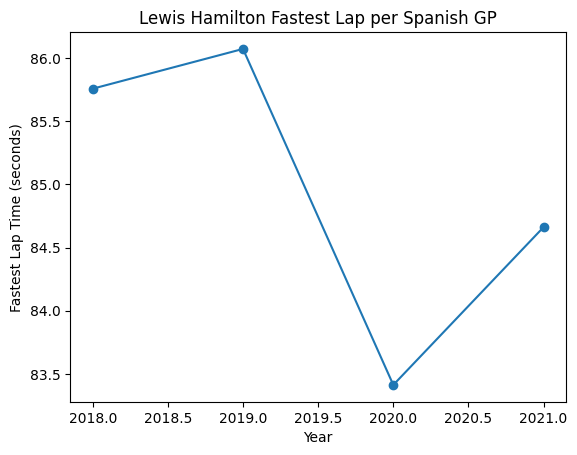

In [27]:
data_path = Path("data")
fastest_laps = []
years = [2018, 2019, 2020, 2021]
for year in years:
    for file in data_path.glob(f"{year}_Spanish_Grand_Prix_laps.csv"):
            df = pd.read_csv(file)
            df['LapTime'] = pd.to_timedelta(df['LapTime'])
            fastest_lap = df['LapTime'].mean()
            fastest_laps.append((year, fastest_lap))

# Only take the years and lap times we actually have
lap_years = [year for year, td in fastest_laps]
lap_times = [td.total_seconds() for year, td in fastest_laps]  # convert to seconds

plt.plot(lap_years, lap_times, marker='o')
plt.xlabel("Year")
plt.ylabel("Fastest Lap Time (seconds)")
plt.title("Lewis Hamilton Fastest Lap per Spanish GP")
plt.show()


No valid laps for 2020_Sakhir_Grand_Prix_laps.csv


d:\fastf1\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\fastf1\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\fastf1\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


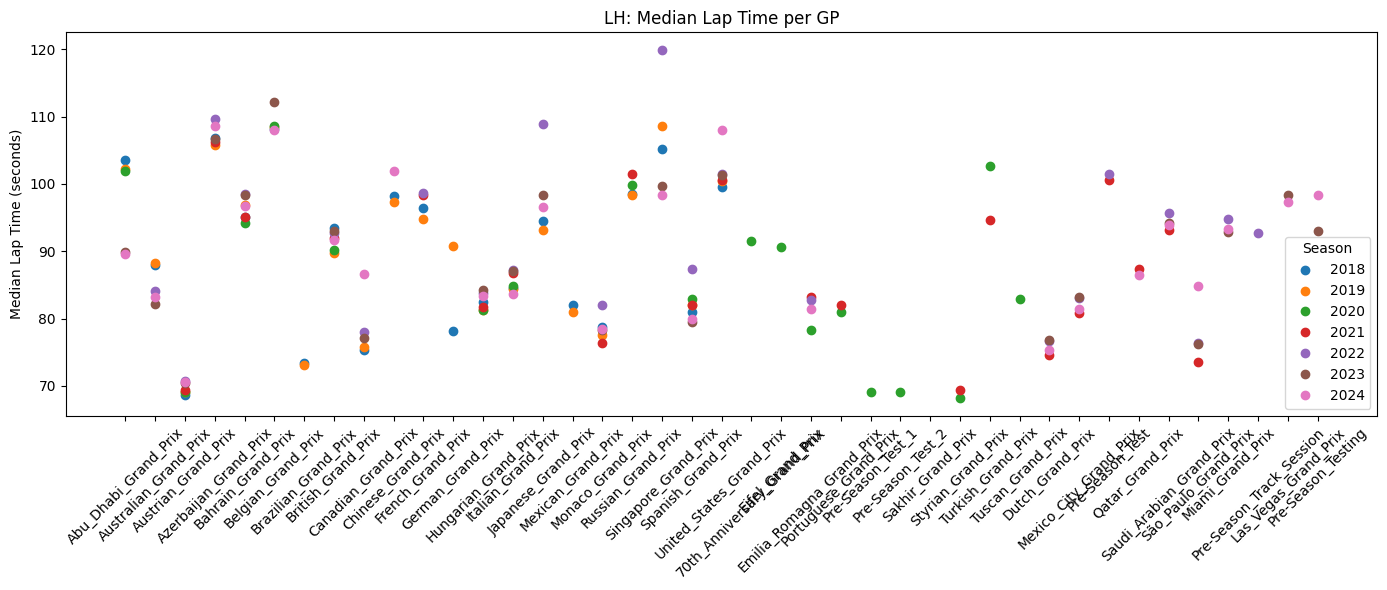

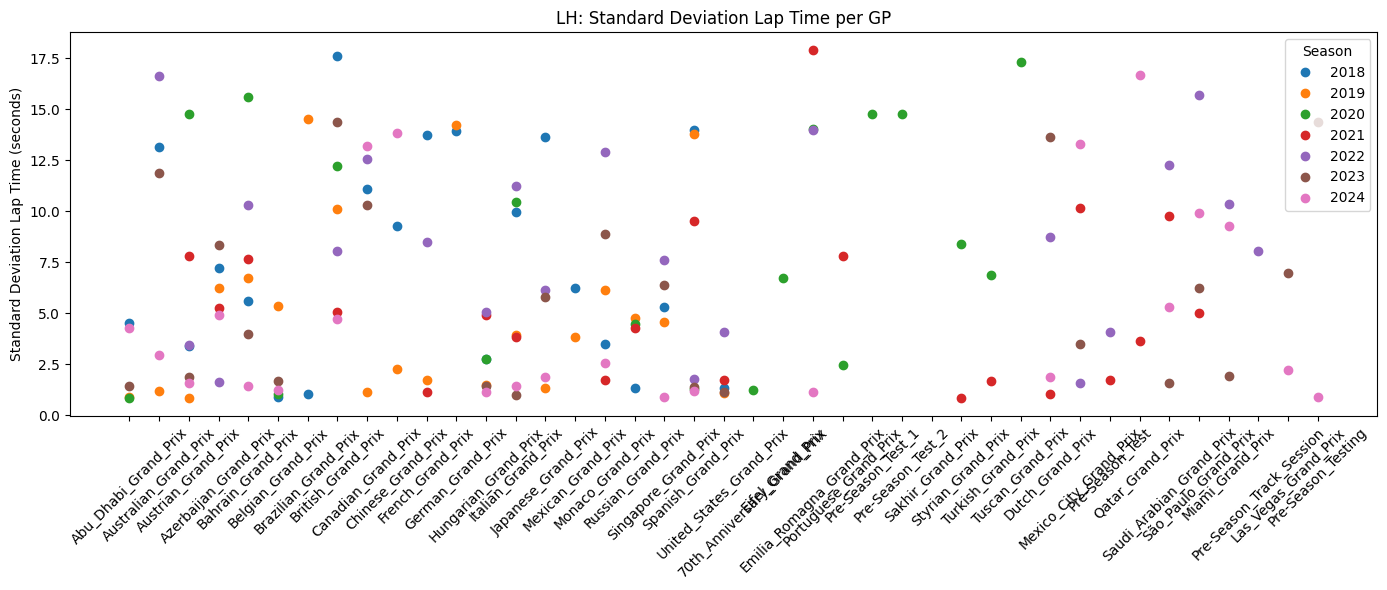

In [42]:
#median and std

years = [2018, 2019, 2020, 2021, 2022, 2023, 2024]
results = {}

for year in years:
    for file in data_path.glob(f"{year}_*_laps.csv"):
        df = pd.read_csv(file)
        df['LapTime'] = pd.to_timedelta(df['LapTime'], errors='coerce')
        clean_laps = df[(df['PitInTime'].isna()) & (df['PitOutTime'].isna())]
        if clean_laps.empty:
            print(f"No valid laps for {file.name}")
        
        median_lap = clean_laps['LapTime'].median().total_seconds()
        consistency = clean_laps['LapTime'].std().total_seconds()

        gp = os.path.basename(file).replace(f"{year}_","").replace("_laps.csv", "")
        results[(year, gp)] = {"median": median_lap, "std": consistency}

df_results = pd.DataFrame.from_dict(results, orient="index")
df_results.index = pd.MultiIndex.from_tuples(df_results.index, names=["Year", "GP"])

plt.figure(figsize=(14,6))

for year in years:
    season_data = df_results.loc[year].sort_index()
    plt.plot(season_data.index, season_data['median'], marker='o', linestyle='', label=str(year))

plt.xticks(rotation=45)
plt.ylabel("Median Lap Time (seconds)")
plt.title("LH: Median Lap Time per GP")
plt.legend(title="Season")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,6))

for year in years:
    season_data = df_results.loc[year].sort_index()
    plt.plot(season_data.index, season_data['std'], marker='o', linestyle='', label=str(year))

plt.xticks(rotation=45)
plt.ylabel("Standard Deviation Lap Time (seconds)")
plt.title("LH: Standard Deviation Lap Time per GP")
plt.legend(title="Season")
plt.tight_layout()
plt.show()

In [50]:
def count_dnfs_for_driver(year, driver_code):
    dnf_count = 0
    schedule = fastf1.get_event_schedule(year)
    races = schedule[schedule['EventFormat'] == 'conventional']

    for index, race in races.iterrows():
        try:
            session = fastf1.get_session(year, race['RoundNumber'], 'R')
            session.load()
            
            driver_results = session.results[session.results['Driver'] == driver_code]
            
            if not driver_results.empty:
                status = driver_results['Status'].iloc[0]
                
                if 'Finished' not in status and 'NC' not in status:
                    # 'NC' stands for 'Not Classified'
                    dnf_count += 1
                    print(f"DNF found for {driver_code} at the {race['EventName']} race.")
            
        except Exception as e:
            print(f"Could not load data for {race['EventName']}: {e}")

    return dnf_count

year_to_check = 2021
driver_code_to_check = 'HAM'

dnf_tally = count_dnfs_for_driver(year_to_check, driver_code_to_check)

print(f"\nLewis Hamilton had a total of {dnf_tally} DNFs in the {year_to_check} season.")

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '11'
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.067000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 

Could not load data for Bahrain Grand Prix: 'Driver'


req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for weather_data. Loading data...
_api           INFO 	Fetching weather data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for race_control_messages. Loading data...
_api           INFO 	Fet

Could not load data for Emilia Romagna Grand Prix: 'Driver'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver 44: Ignoring late data f

Could not load data for Portuguese Grand Prix: 'Driver'


req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api          

KeyboardInterrupt: 